In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
import os
import json
import string
import nltk

%matplotlib inline

In [76]:
%config Completer.use_jedi=False

In [77]:
data = pd.read_csv(r"E:\DSP\DSP_22nd Nov\Machine Learning\FInal Class\Case Studies & FInal Projects\6\data job posts.csv")
data.head()

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\nJOB TITL...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\nc...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\nI...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\nJOB...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\nn...,NaN,2004,1,False
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\nPe...,NaN,23 January 2004\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\nJOB TITLE: Software D...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\n- CV; \n-...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


In [85]:
data.shape

(19001, 24)

In [86]:
data.RequiredQual.shape

(19001,)

In [87]:
data = data.drop_duplicates(["RequiredQual"]) # Removing the Duplicates from whole data set based on RequiredQual
# Reason for that Since we have to perform Clsutering on this particular column

In [88]:
data.RequiredQual.shape

(16689,)

In [89]:
data.shape

(16689, 24)

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16689 entries, 0 to 19000
Data columns (total 24 columns):
jobpost             16689 non-null object
date                16689 non-null object
Title               16670 non-null object
Company             16689 non-null object
AnnouncementCode    1104 non-null object
Term                6854 non-null object
Eligibility         4165 non-null object
Audience            484 non-null object
StartDate           8475 non-null object
Duration            9498 non-null object
Location            16677 non-null object
JobDescription      13563 non-null object
JobRequirment       14910 non-null object
RequiredQual        16688 non-null object
Salary              8610 non-null object
ApplicationP        16689 non-null object
OpeningDate         16178 non-null object
Deadline            16672 non-null object
Notes               1675 non-null object
AboutC              10938 non-null object
Attach              1149 non-null object
Year               

In [91]:
data.RequiredQual.head()

0    To perform this job successfully, an\nindividu...
1    - Bachelor's Degree; Master's is preferred;\n-...
2    - Degree in environmentally related field, or ...
3    - Advanced degree in public health, social sci...
4    - University degree; economical background is ...
Name: RequiredQual, dtype: object

In [92]:
data.RequiredQual = data.RequiredQual.astype(str)  # The conversion data type is not given in commas
# Converting to string type for smooth processing

In [93]:
data.RequiredQual.dtype

dtype('O')

In [94]:
data["RequiredQual_tokenize"] = data.RequiredQual.map(word_tokenize)

In [95]:
data.RequiredQual_tokenize[:10]

0    [To, perform, this, job, successfully, ,, an, ...
1    [-, Bachelor, 's, Degree, ;, Master, 's, is, p...
2    [-, Degree, in, environmentally, related, fiel...
3    [-, Advanced, degree, in, public, health, ,, s...
4    [-, University, degree, ;, economical, backgro...
5    [-, Candidates, should, be, female, ,, 20-30, ...
6    [-, University, degree, in, finance/, accounti...
7                                                [nan]
8    [-, University, degree, ;, -, At, least, 3, ye...
9    [NOTE, :, All, applicants, are, instructed, to...
Name: RequiredQual_tokenize, dtype: object

In [96]:
data["RequiredQual_Len"] = data.RequiredQual_tokenize.apply(len)

In [97]:
data.RequiredQual_Len[:10] # No.of Tokens in each row

0    455
1     61
2     47
3    112
4     63
5     43
6     85
7      1
8     78
9    223
Name: RequiredQual_Len, dtype: int64

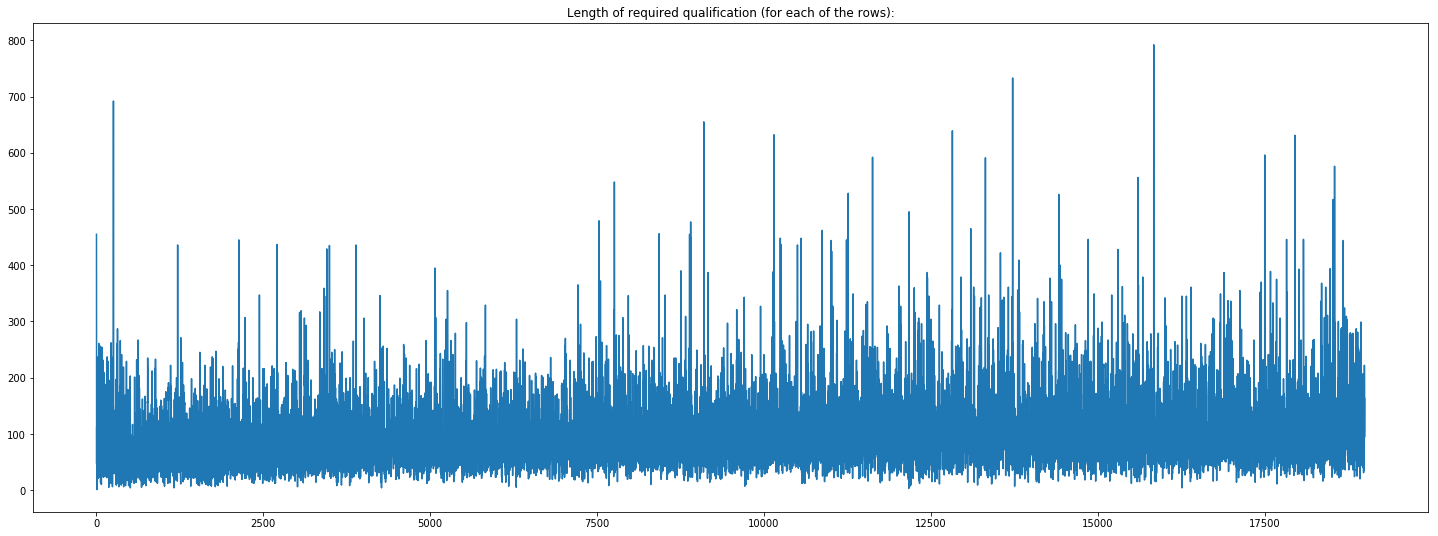

In [98]:
plt.figure(figsize=(25, 9))
plt.plot(data.RequiredQual_Len)
plt.title('Length of required qualification (for each of the rows):')
plt.show()

In [99]:
data['RequiredQual_token_unique'] = data.RequiredQual_tokenize.apply(set) # For Unique tokens

In [100]:
data.RequiredQual_token_unique.head()

0    {Principles, sources, training, company, assig...
1    {Past, Armenian, with, :, English, work, 's, t...
2    {environmental, Armenian, with, :, English, Ar...
3    {Familiarity, five, world, facilitation, with,...
4    {2, development, Will, with, background, SQL, ...
Name: RequiredQual_token_unique, dtype: object

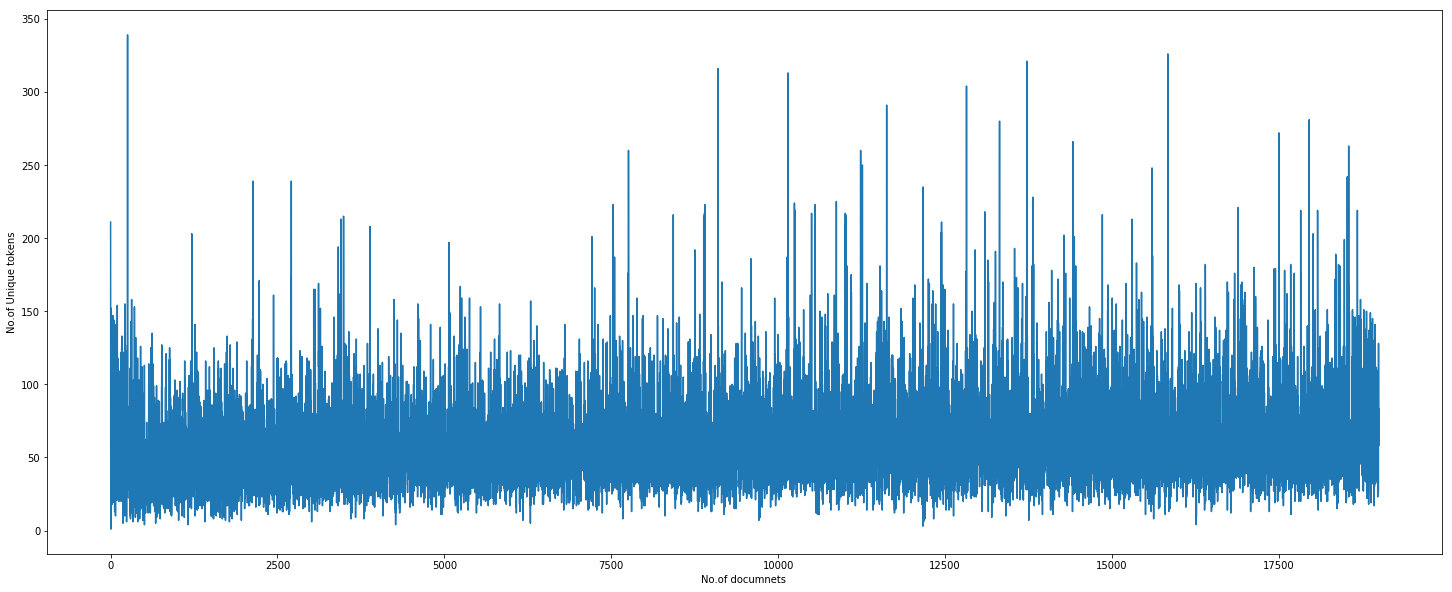

In [101]:
plt.figure(figsize=(25,10))
plt.plot(data.RequiredQual_token_unique.apply(len))
plt.xlabel("No.of documnets ")
plt.ylabel("No.of Unique tokens")
plt.show()
# Maximum count is near to 340 

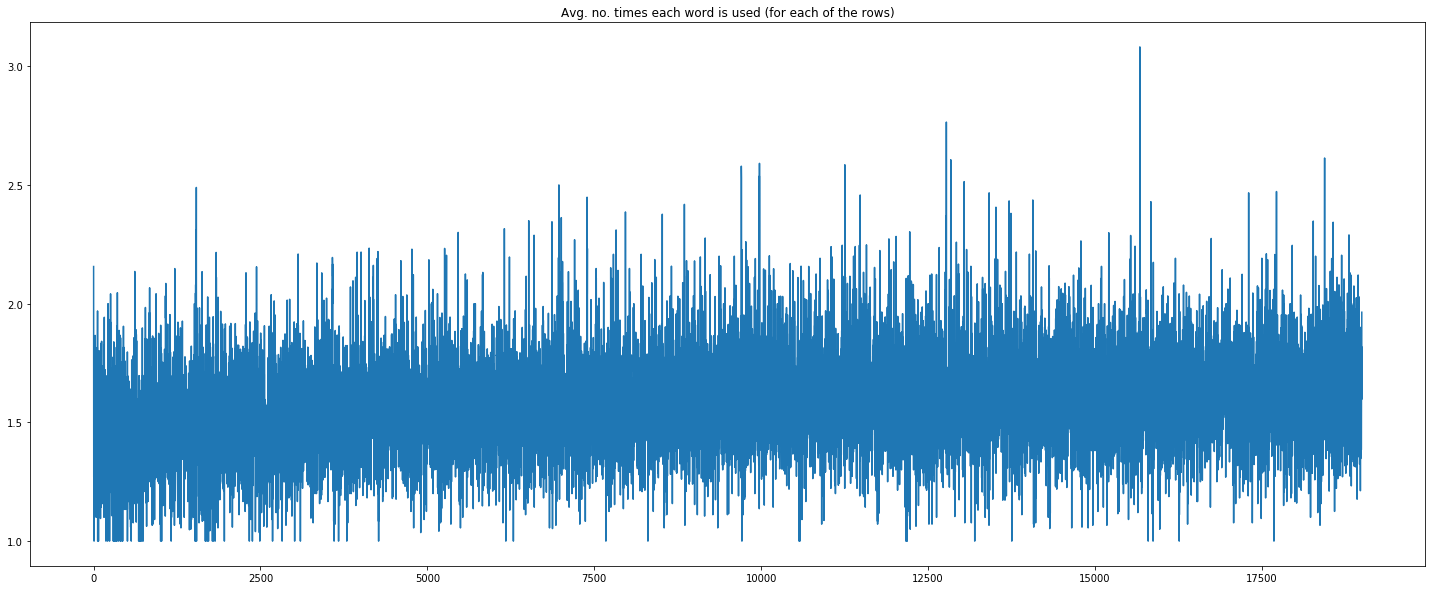

In [102]:
plt.figure(figsize=(25, 10))
plt.plot((data.RequiredQual_Len) / data.RequiredQual_token_unique.apply(len))
plt.title('Avg. no. times each word is used (for each of the rows)')
plt.show()
# Maximum count is 3
# on an average, words are getting repeated ~2 times

In [103]:
### Using Frequency Distribution PLot :

In [104]:
token = data.RequiredQual_tokenize[0]

In [105]:
freq_dist = nltk.FreqDist(token)

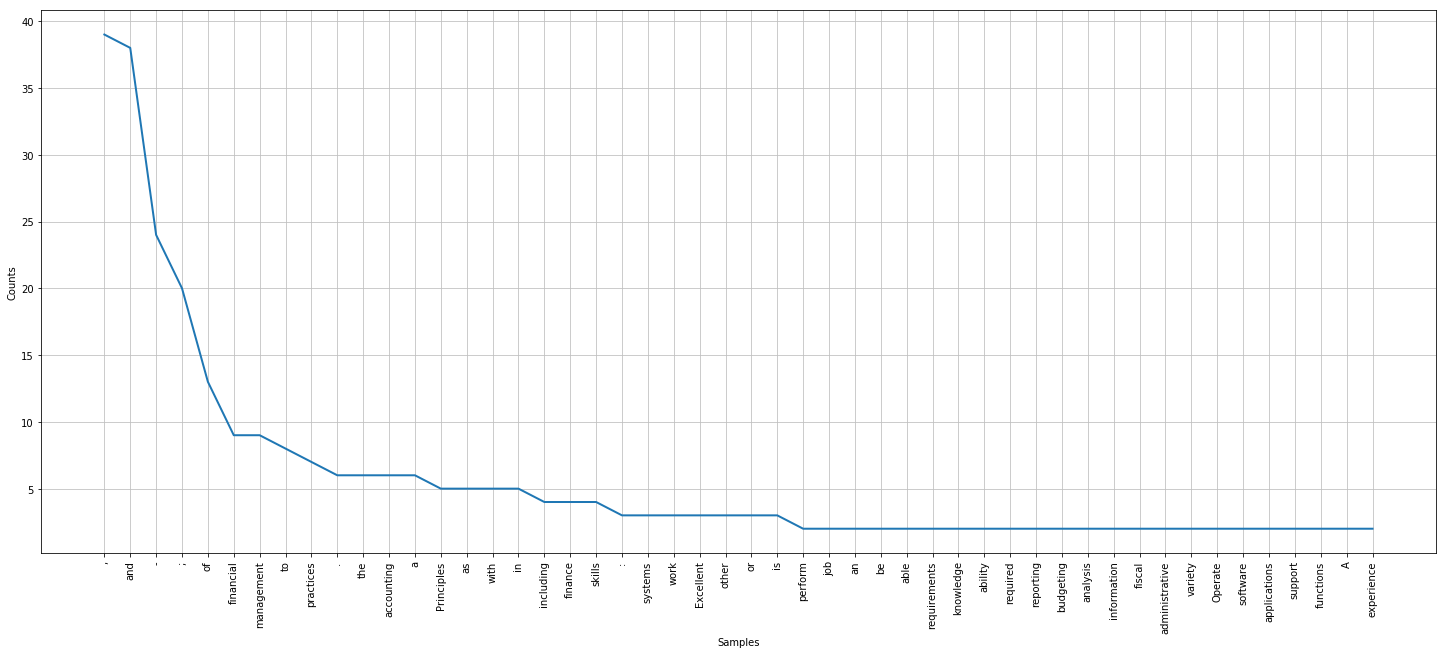

In [106]:
plt.figure(figsize=(25,10))
freq_dist.most_common(50)
freq_dist.plot(50)
# These are the 50 most frequent words in the First row of RequiredQual_tokenize (Doing only after tokenization makes sense!)

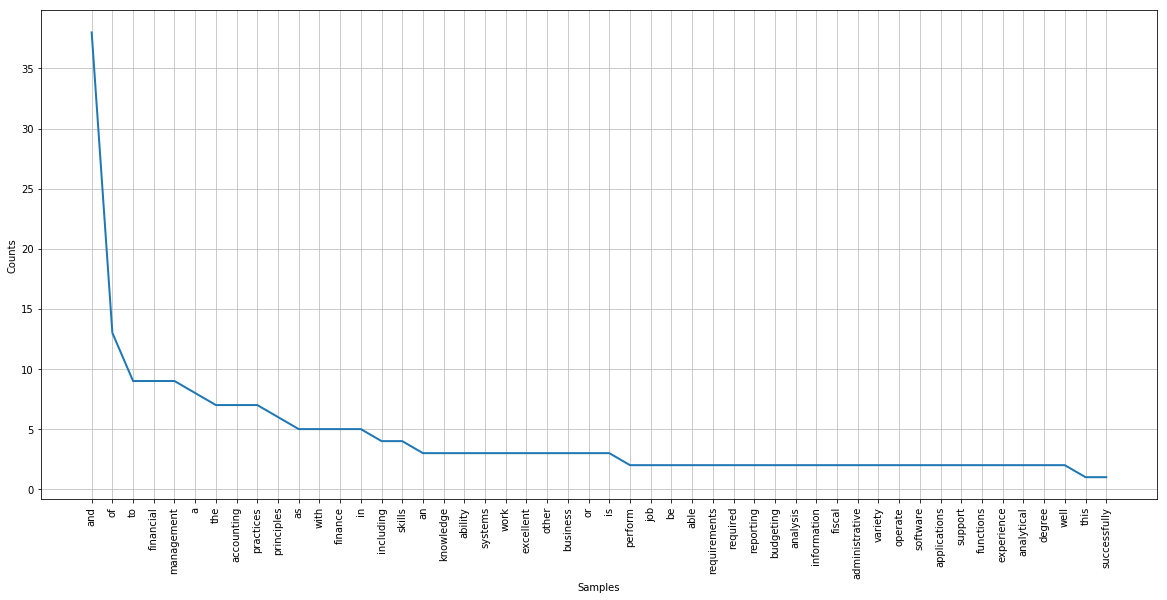

In [107]:
# Remove punctuations, convert all to lower-case, and Let's see:
token_nop = [t for t in token if t not in string.punctuation]
token_nop = [t.lower() for t in token_nop]
plt.figure(figsize=(20, 9))
fd = nltk.FreqDist(token_nop)  # case sensitive!
fd.most_common(50)
fd.plot(50)

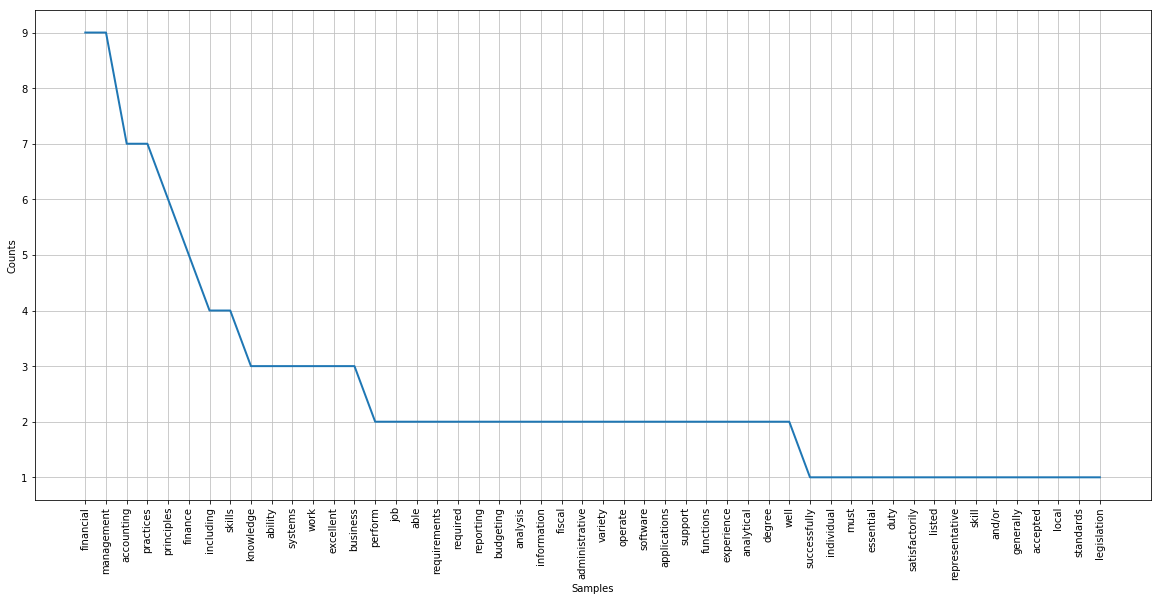

In [108]:
# Remove stopwords also
stop = stopwords.words('english')
token_nostop = [t for t in token_nop if t not in stop]
plt.figure(figsize=(20, 9))
fd = nltk.FreqDist(token_nostop)  # case sensitive!
fd.most_common(50)
fd.plot(50)

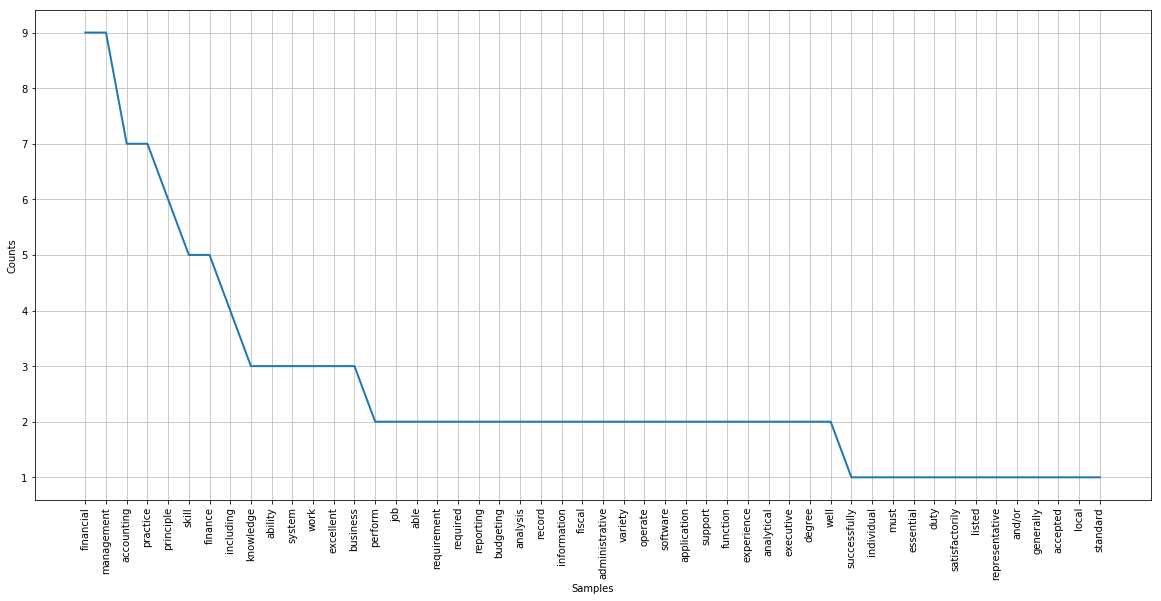

In [109]:
wnl = nltk.WordNetLemmatizer()
token_lem = [wnl.lemmatize(t) for t in token_nostop]
plt.figure(figsize=(20, 9))
fd = nltk.FreqDist(token_lem)  # case sensitive!
fd.most_common(50)
fd.plot(50)

In [110]:
token_clean = [t for t in token_lem if len(t) >= 3]  # simple way to remove the offending " punctuations
text_clean = " ".join(token_clean)

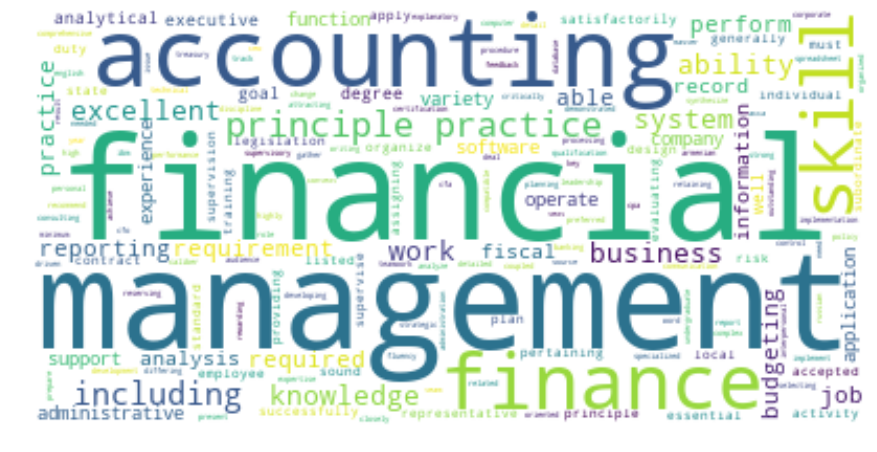

In [111]:
import wordcloud
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
plt.figure(figsize=(15,10))
wc = WordCloud(background_color="white").generate(text_clean)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### Creating a function that will do the above tasks for all the rows in RequiredQual_tokenize:

In [112]:
def preprocess(tokens):
    tokens_nop = [t for t in tokens if t not in string.punctuation] # Removing punctuations
    tokens_nop = [t.lower() for t in tokens_nop] # Converting to Lower case
    wnl = nltk.WordNetLemmatizer() # Performing Lemmatization
    stop = stopwords.words('english')
    tokens_nostop = [t for t in tokens_nop if t not in stop] # Removing Stopwords
    tokens_lem = [wnl.lemmatize(t) for t in tokens_nostop]
    tokens_clean = [t for t in tokens_lem if len(t) >= 3]  # simple way to remove the offending " punctuations
    return tokens_clean

def plotWC(tokens):
    text_clean = " ".join(tokens)
    print(text_clean)
    wc = WordCloud(background_color="white").generate(text_clean)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    plt.figure(figsize=(20, 9))
    fd = nltk.FreqDist(tokens)  # case sensitive!
    fd.plot(50)

In [113]:
tokens_clean = preprocess((data.iloc[4])['RequiredQual_tokenize']) # we know this is a software job
print(tokens_clean)

['university', 'degree', 'economical', 'background', 'plus', 'excellent', 'knowledge', 'window', '2000', 'server', 'networking', 'tcp/', 'technology', 'sql', '2000', 'server', 'visual', 'basic', 'least', 'year', 'experience', 'database', 'software', 'development', 'good', 'knowledge', 'english', 'remuneration', 'commensurate', 'norm', 'accepted', 'company']


university degree economical background plus excellent knowledge window 2000 server networking tcp/ technology sql 2000 server visual basic least year experience database software development good knowledge english remuneration commensurate norm accepted company


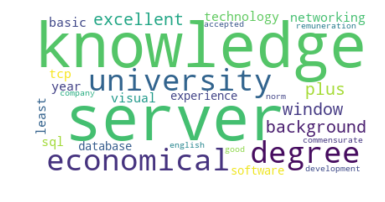

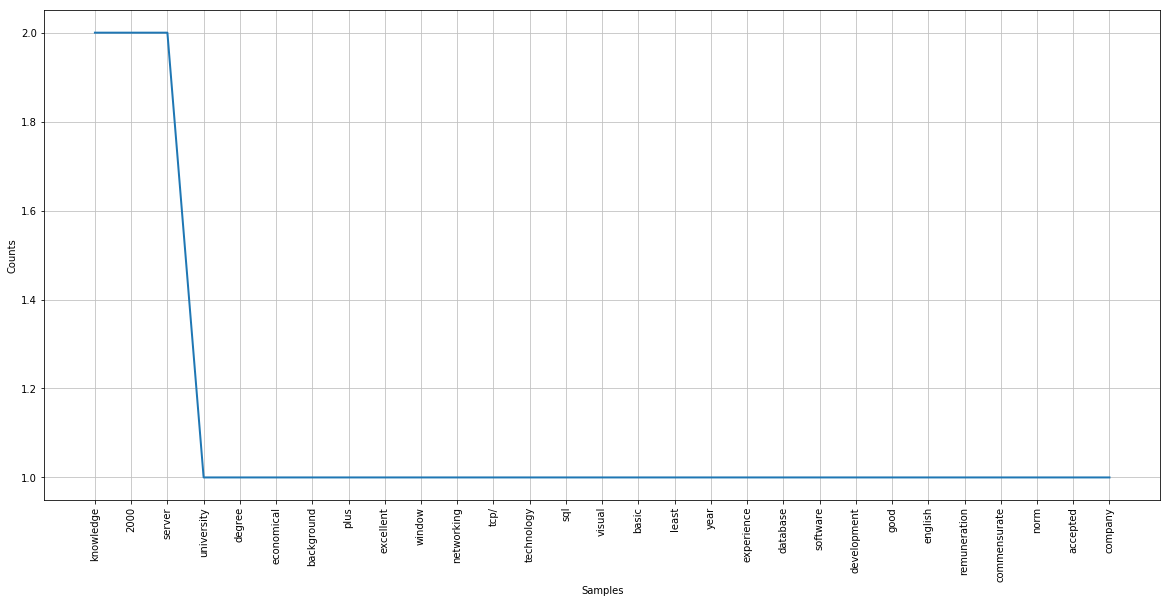

In [114]:
plotWC(tokens_clean)

In [115]:
data['RequiredQual_processed'] = data.RequiredQual_tokenize.apply(preprocess) # Cleaning all the rows of RequiredQual_tokenize

In [116]:
data.RequiredQual_processed.head()

0    [perform, job, successfully, individual, must,...
1    [bachelor, degree, master, preferred, excellen...
2    [degree, environmentally, related, field, year...
3    [advanced, degree, public, health, social, sci...
4    [university, degree, economical, background, p...
Name: RequiredQual_processed, dtype: object

### Feature Matrix

In [117]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
    
data['RequiredQual_processedtext'] = data.RequiredQual_processed.apply(lambda x: ' '.join(x))

In [118]:
vec_tf = CountVectorizer(min_df=2)
required_qual_tf = vec_tf.fit_transform(data['RequiredQual_processedtext'])
print(required_qual_tf.shape)

(16689, 6848)


In [121]:
dtm = required_qual_tf.toarray()
dtm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [124]:
dtm = pd.DataFrame(dtm)

In [125]:
dtm.columns = vec_tf.get_feature_names()

In [126]:
dtm.head()

,00,000,04,10,100,1000,10g,11,11g,12,...,ysu,yugoslavia,yui,zabbix,zend,zendframework,zigbee,zone,zones,zoology
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
vec_tfidf = TfidfVectorizer(max_df=0.7, min_df=3, use_idf=True)
required_qual_tfidf = vec_tfidf.fit_transform(data['RequiredQual_processedtext'])
print(required_qual_tfidf.shape)

(16689, 5591)


In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline

# Use SVD to reduce dimensions
svd = TruncatedSVD(1500)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)
X_lsa = lsa.fit_transform(required_qual_tfidf)

In [129]:
explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(int(explained_variance * 100)))

Explained variance of the SVD step: 89%


In [143]:
from sklearn.cluster import KMeans
from sklearn import metrics

### No.of Clusters = 6

In [151]:
km_6 = KMeans(n_clusters=6,max_iter=1000,random_state=12)

In [152]:
km_6.fit(X_lsa)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=12, tol=0.0001, verbose=0)

In [153]:
metrics.silhouette_score(X_lsa,km_6.labels_)

0.010961096085249894

In [154]:
def print_terms(cm, num):
    original_space_centroids = svd.inverse_transform(cm.cluster_centers_)# svd.inverse_transform(km_6.cluster_centers_)
    order_centroids = original_space_centroids.argsort()[:, ::-1] 
    terms = vec_tfidf.get_feature_names()
    for i in range(num):
        print("Cluster %d:" % i, end='')
        for ind in order_centroids[i, :10]:
            print(' %s' % terms[ind], end='')
        print()

print_terms(km_6,6)

Cluster 0: ability management work degree excellent year project good armenian international
Cluster 1: net sql asp server web framework development good work technology
Cluster 2: higher education work russian excellent armenian good ability computer field
Cluster 3: excellent work ability russian university armenian degree communication good field
Cluster 4: development good ability design programming software plus web system testing
Cluster 5: accounting finance armenian tax work financial good legislation excellent standard


### No.of Clusters = 7

In [140]:
# According to the HInt file , DIrectly jumping to this COnclusion
km_7 = KMeans(n_clusters=7,init="k-means++",max_iter=1000,n_init=1,random_state=12)

In [141]:
km_7.fit(X_lsa)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=7, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=12, tol=0.0001, verbose=0)

In [142]:
metrics.silhouette_score(X_lsa,km_7.labels_)

0.013392196786726816

In [144]:
def print_terms(cm, num):
    original_space_centroids = svd.inverse_transform(cm.cluster_centers_)# svd.inverse_transform(km_7.cluster_centers_)
    order_centroids = original_space_centroids.argsort()[:, ::-1] 
    terms = vec_tfidf.get_feature_names()
    for i in range(num):
        print("Cluster %d:" % i, end='')
        for ind in order_centroids[i, :10]:
            print(' %s' % terms[ind], end='')
        print()

print_terms(km_7,7)

Cluster 0: management ability project international excellent work degree development armenian year
Cluster 1: accounting finance tax armenian work software standard excellent good financial
Cluster 2: development net sql good web ability programming software plus testing
Cluster 3: excellent work ability russian armenian university degree communication good strong
Cluster 4: banking bank legislation economics financial finance work good year armenian
Cluster 5: higher education work excellent russian armenian computer good ability field
Cluster 6: good ability work year degree plus technical system engineering computer
